In [8]:
import numpy as np
import collections
import json

import matplotlib.pyplot as plt
#plt.switch_backend('agg')
import matplotlib
import sys
import os
sys.path.append('../')
from utils import utils
from utils import mpl_stylesheet
from utils import read_tejaas_results
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 22, colors = 'banskt', dpi = 300)

In [25]:
tissue_file = '../tissue_table.txt'
resdir = "/usr/users/sbanerj/trans_eqtl_results/gtex_v8_tejaas_permnull_sb0.1_knn"
eqtlgen_file = '/usr/users/sbanerj/trans_eqtl_results/eqtlgen_bed_hg38.txt'

In [10]:
tshorts, tfulls = utils.read_tissues(tissue_file)

In [33]:
EQTL_FIELDS = ['chrom', 'varid', 'bp_pos', 'pval', 'log10pval']
class EqtlInfo(collections.namedtuple('_EQTL_FIELDS', EQTL_FIELDS)):
    __slots__ = ()

def read_eqtlgen_results(infile):
    res = list()

    idlist = list()
    chrmlist = list()
    poslist = list()
    #pvallist = list()

    with open(infile, 'r') as instream:
        next(instream)
        for line in instream:
            linesplit = line.strip().split()
            chrm = int(linesplit[0].strip()[3:])
            bppos = int(linesplit[1].strip())
            varid = f'chr{chrm}_{bppos}'
            #pval = float(linesplit[0].strip())

            idlist.append(varid)
            chrmlist.append(chrm)
            poslist.append(bppos)

    return idlist      

In [34]:
eqtlgen = read_eqtlgen_results(eqtlgen_file)

In [16]:
ntot = 0
transeqtls = dict()
for tissue in tshorts:
    resfilename = os.path.join(resdir, tissue, 'trans_eqtls.txt')
    transeqtls[tissue] = read_tejaas_results.transeqtls(resfilename)
    #print(f'{tissue}: {len(transeqtls)} trans-eQTLs')
    nteqtl = len(transeqtls[tissue])
    ntot += nteqtl
    
print(ntot)

46337


In [22]:
unique_transeqtls = list()
for tissue in tshorts:
    for transeqtl in transeqtls[tissue]:
        varid = transeqtl.varid
        if varid not in unique_transeqtls:
            unique_transeqtls.append(varid)

In [23]:
len(unique_transeqtls)

25620

In [36]:
unique_transeqtls[0]

'chr1_1170732_A_G_b38'

In [41]:
replicated = 0
for varid in unique_transeqtls:
    info = varid.strip().split('_')
    varid_mod = f'{info[0]}_{info[1]}'
    if varid_mod in eqtlgen:
        replicated += 1

In [44]:
len(eqtlgen)

3852

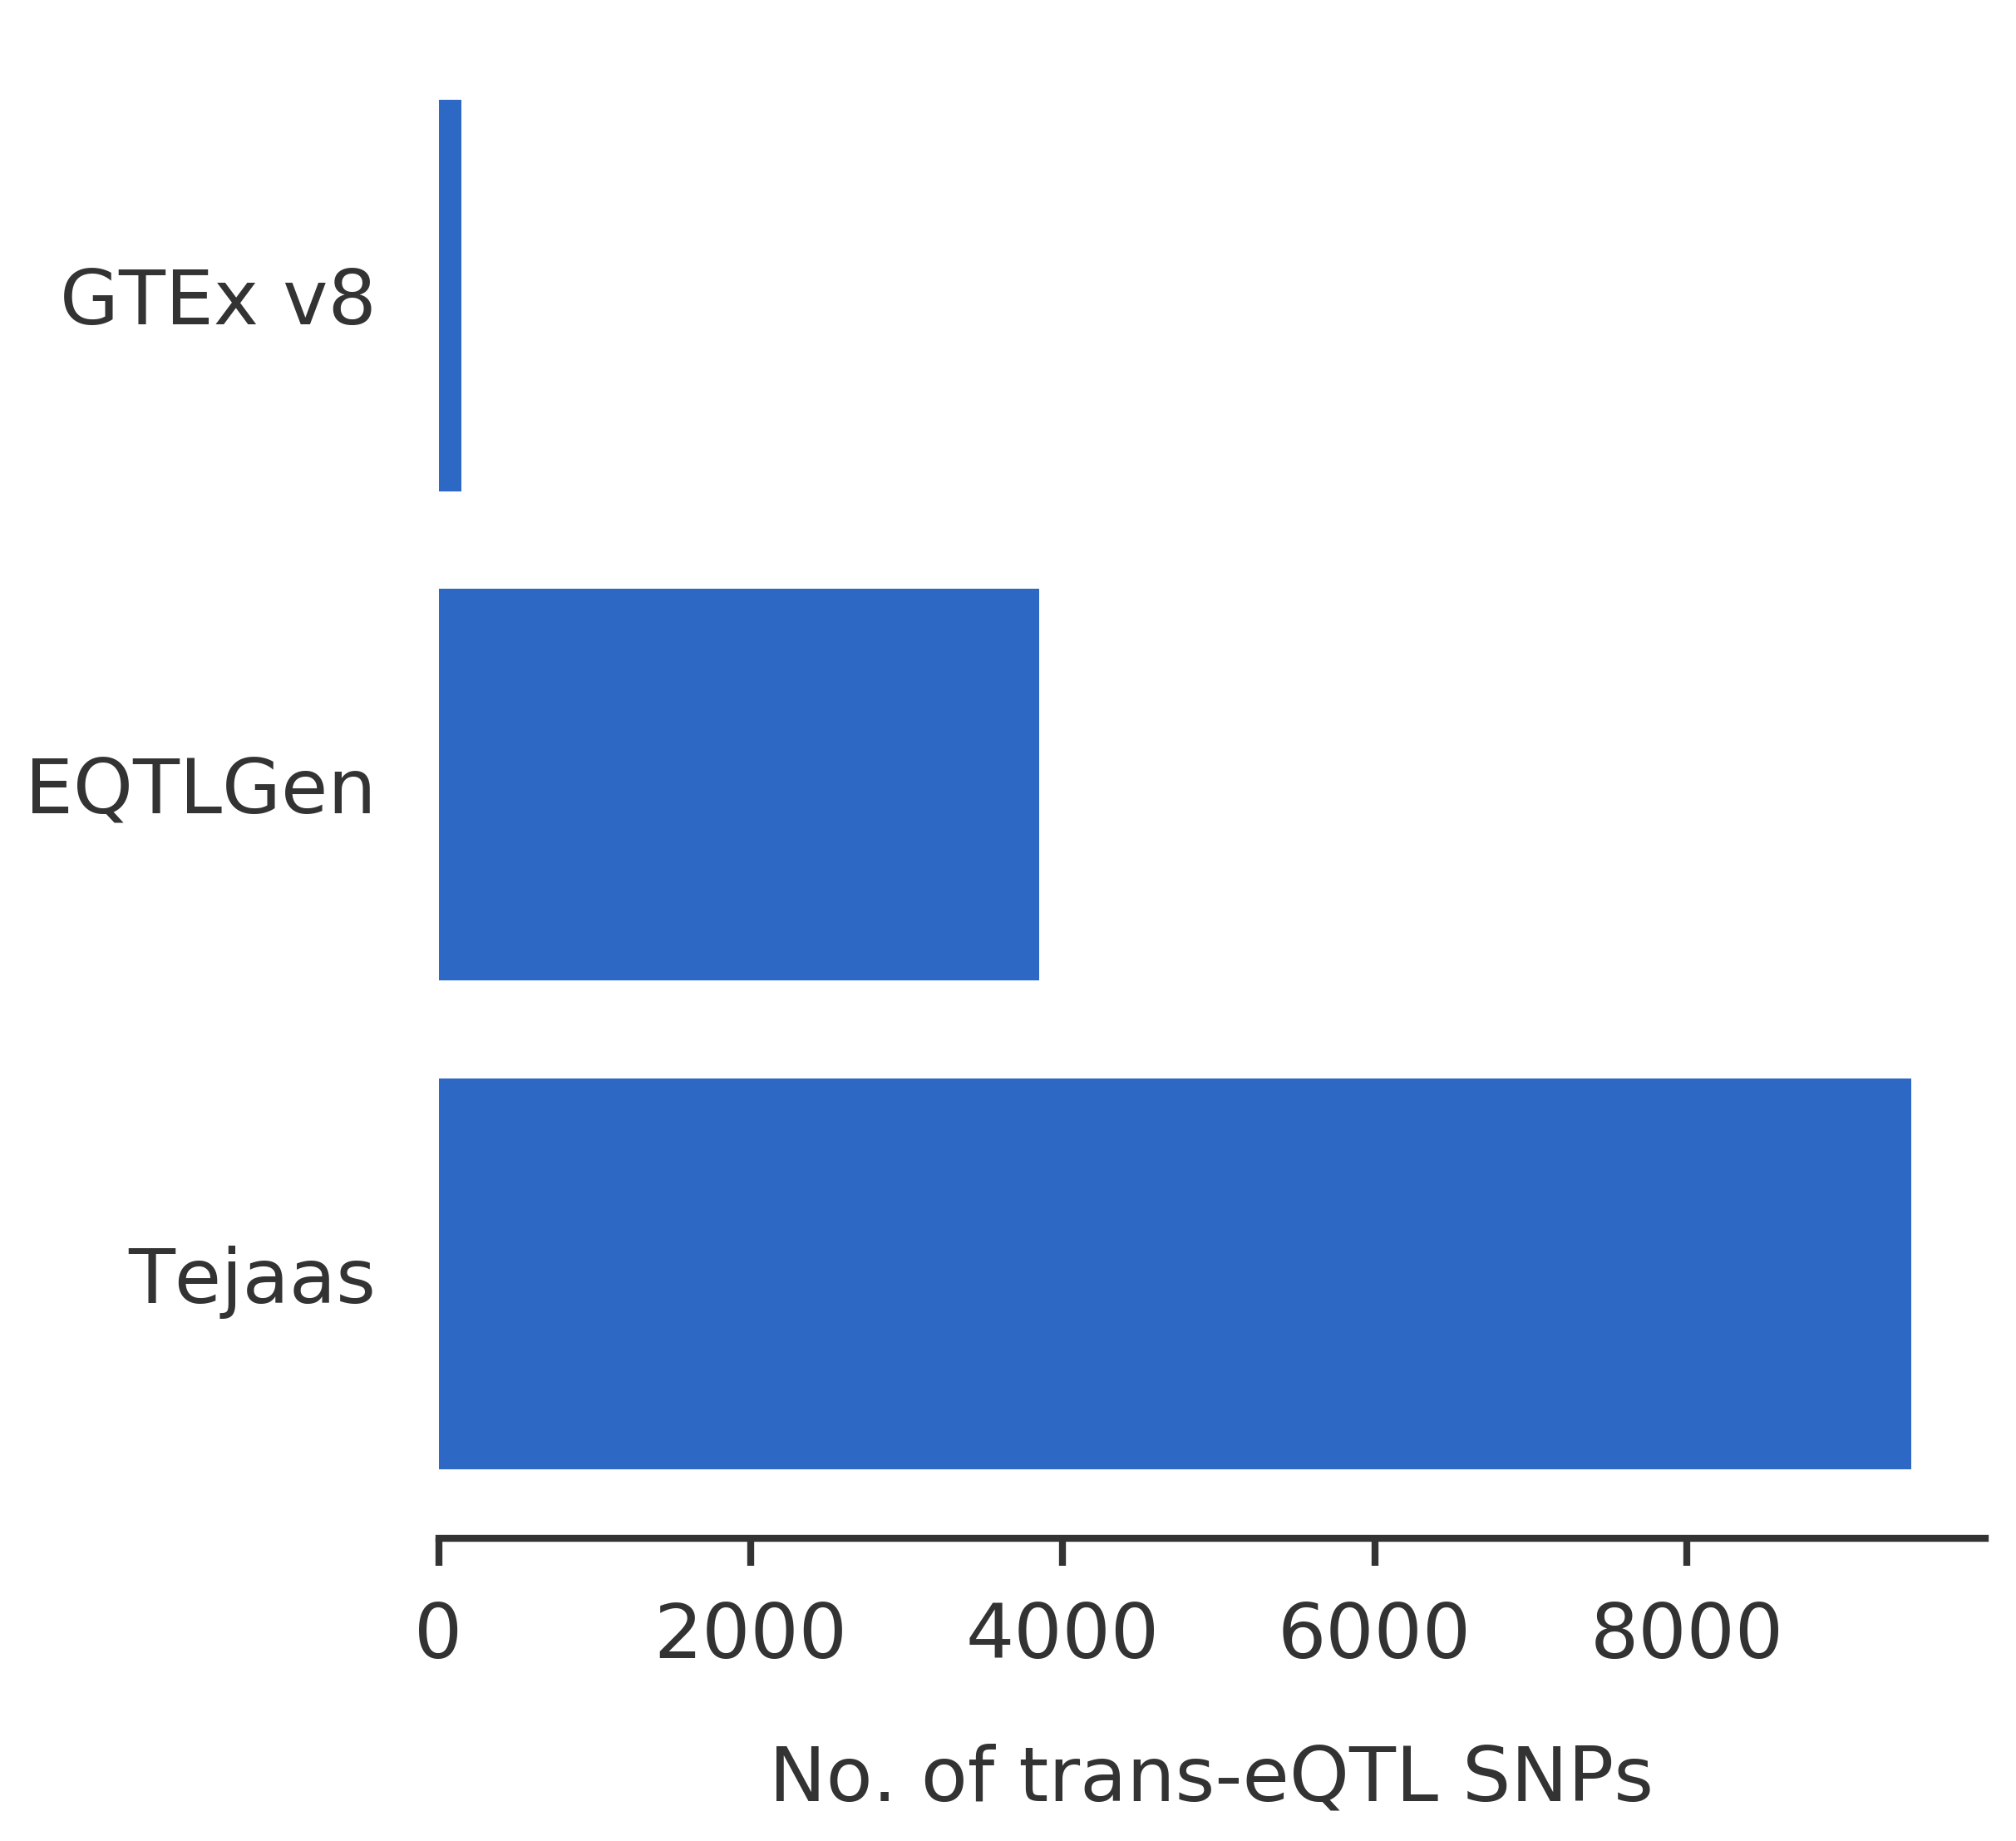

In [51]:
objects = list()
performance = list()
significance = list()
bar_colors = list()
bar_heights = list()

performance = [9439, len(eqtlgen), 148]
objects = ['Tejaas', 'EQTLGen', 'GTEx v8']
    

fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)

y_pos = np.arange(len(objects))
bar1 = ax1.barh(y_pos, performance, align='center', linewidth = 0)

ax1.set_yticks(y_pos)
ax1.set_yticklabels(objects)
ax1.set_xlabel('No. of trans-eQTL SNPs')

ax1.tick_params(bottom = True, top = False, left = False, right = False, labelleft = True, labelbottom = True)
for side, border in ax1.spines.items():
    if not side == 'bottom':
        border.set_visible(False)

#fig.canvas.draw()
#xticklabels = [f'{x.get_position()[0] + 1 :3.1f}' for x in ax1.get_xticklabels()]
#ax1.set_xticklabels(xticklabels)

plt.savefig('../plots/number_comparison.png', bbox_inches='tight')
plt.show()